In [36]:
"""
Try out some simple clustering of time-freq data blocks
from using KMeans.

Expects to read numpy arrays from disk which can be prepared
earlier from filterbank data using the prepare_binned_data
notebook.
"""

%matplotlib inline
from __future__ import print_function
import glob

import numpy as np
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [37]:
# USER PARAMS
data_dir = '../../data'

In [38]:
# CALCULATE SOME SIMPLE FEATURES TO BE USED IN THE CLUSTERING

# There is scope here for more complicated features to be added
# later.

dir_files = glob.glob(data_dir+'/*.npy')

# will only process files with these dimensions
# (go for uniformity in size for now)
time_dim = 277
freq_dim = 64

files = []
for f in dir_files:
    d = np.load(f)
    if np.shape(d)[0] == time_dim and np.shape(d)[1] == freq_dim:
        files.append(f)

num_files = len(files)
print("To process", num_files, "files of dim", time_dim, freq_dim)

features = np.zeros((num_files,time_dim*2+freq_dim*2))

i = 0
for f in files:
  
  # load numpy array from disk
  d = np.load(f)
    
  # calulate features over the time axis  
  time_mean = d.mean(axis=0) # produces array of freq_dim values
  time_std = d.std(axis=0)

  # calculate features over the freq axis  
  freq_mean = d.mean(axis=1) # produces array of time_dim values
  freq_std = d.std(axis=1)

  # (FUTURE: add more feature calculations here and add results to line below)  

  features[i] = np.concatenate((time_mean,time_std,freq_mean,freq_std))  
    
  i += 1

print("shape of feature array=",features.shape)    

To process 145 files of dim 277 64
shape of feature array= (145, 682)


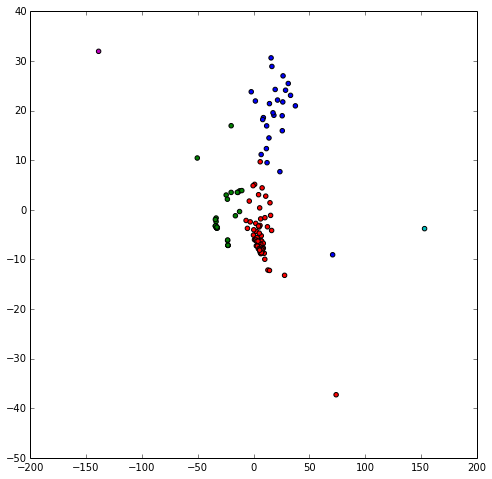

In [39]:
# clustering

km = KMeans(n_clusters=5) # don't exceed colour map below for now :)
km.fit(features)

# plot with dimensionality reduction

pca = PCA(n_components=2)
pca.fit(features)

colours = ['b', 'g','r','c','m','y']

pl.figure(figsize=(8,8))

i = 0;
for label in km.labels_:
    Y = pca.transform(features[i])
    pl.scatter(Y[:, 0], Y[:, 1], c=colours[label])
    i += 1
    
pl.show()

# Should see some fairly obvious clusters below with some outliers.
# The clusters found by KMeans are identified with the different
# colours.


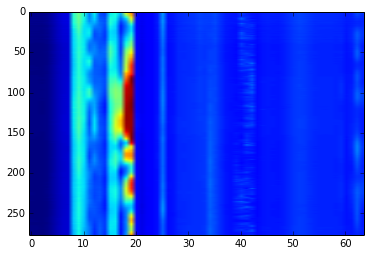

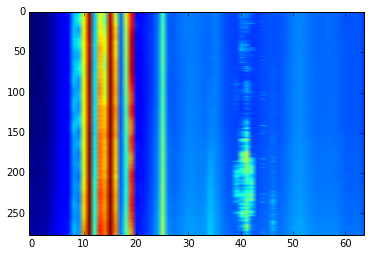

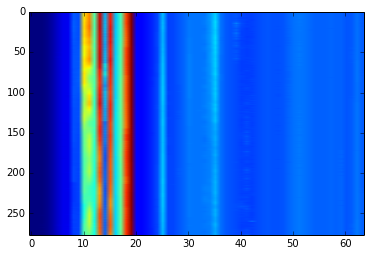

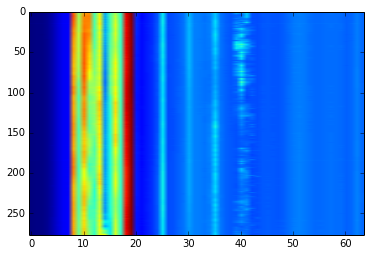

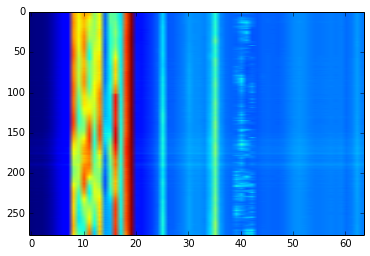

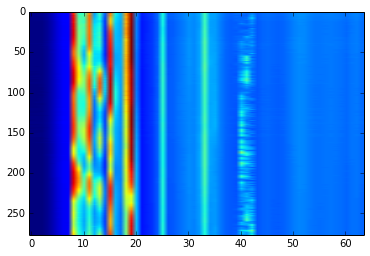

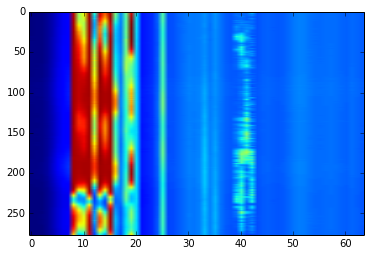

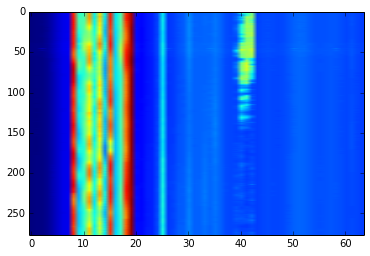

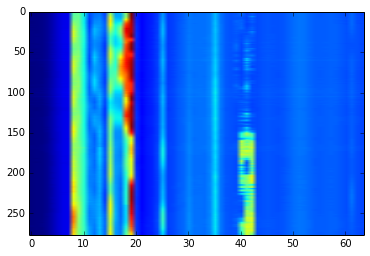

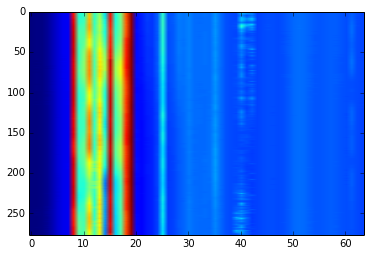

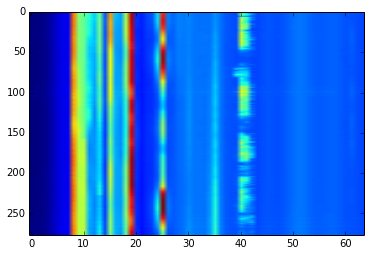

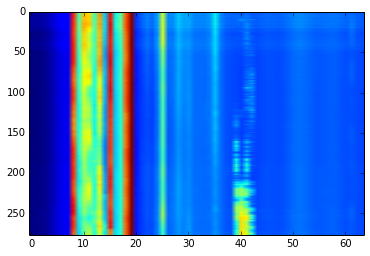

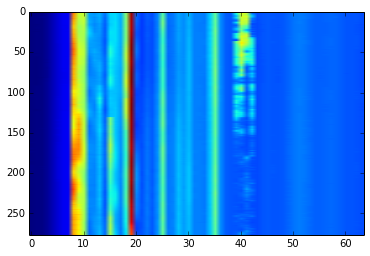

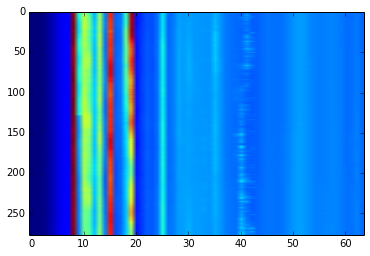

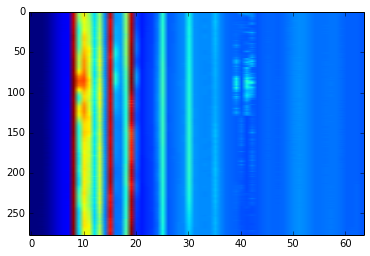

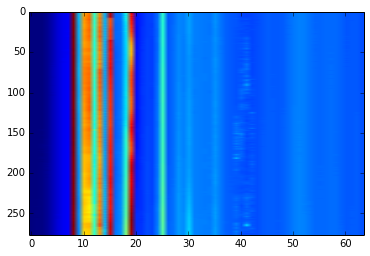

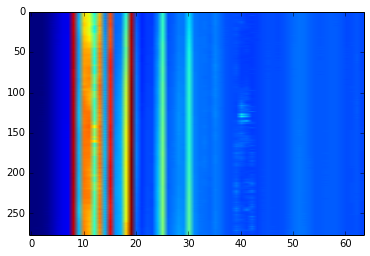

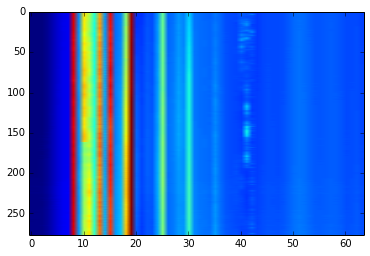

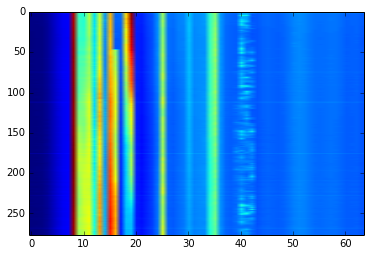

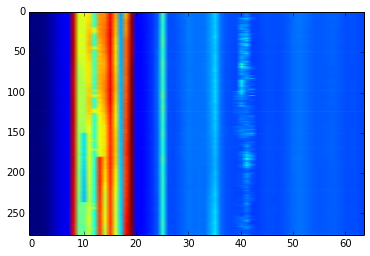

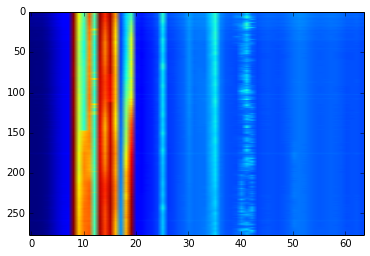

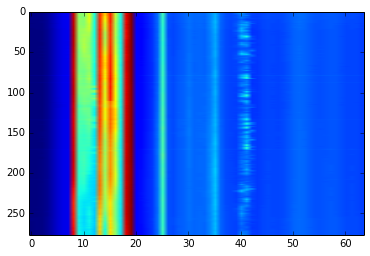

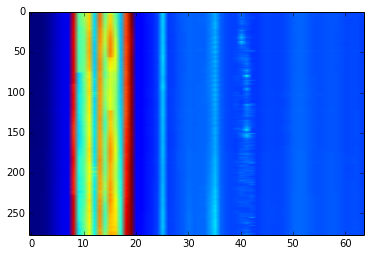

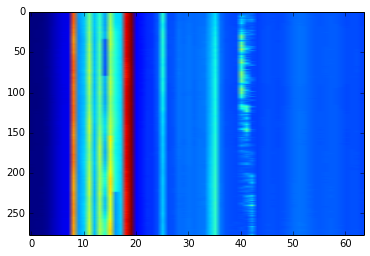

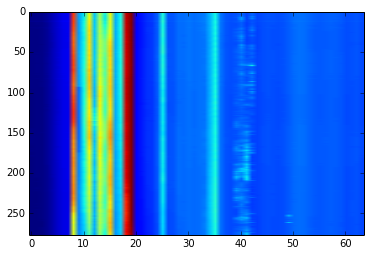

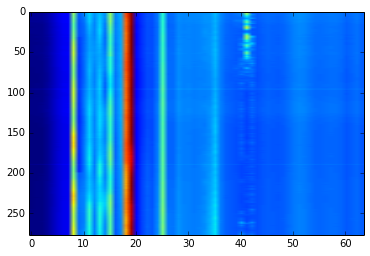

In [40]:
# Show all the images associated with each class.

# TODO: Probably nicer to do this in a more compact
# way with subplots in future.

# CLASS 0
i = 0;
for label in km.labels_:
    if label == 0:
        # load numpy array from disk
        d = np.load(files[i])
        pl.imshow(d, aspect='auto')
        pl.show()
    i += 1

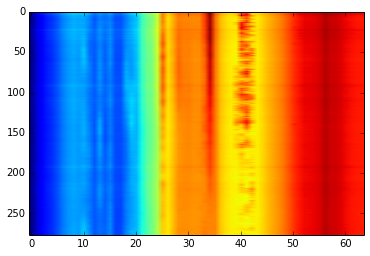

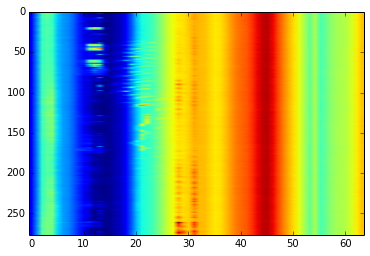

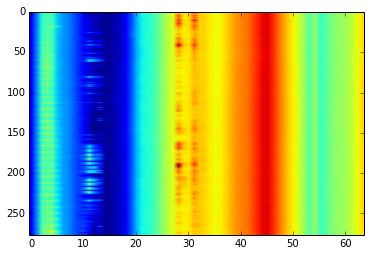

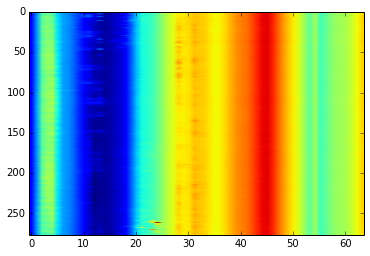

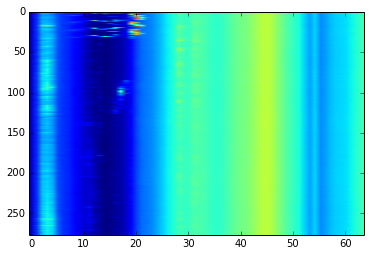

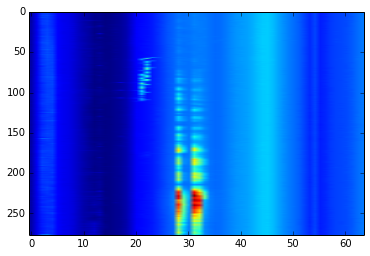

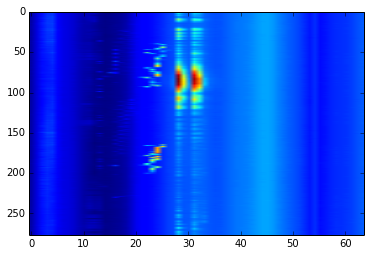

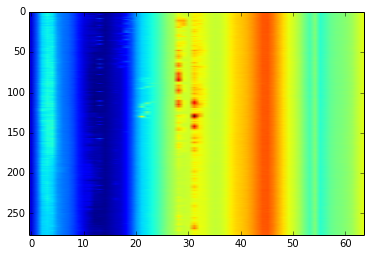

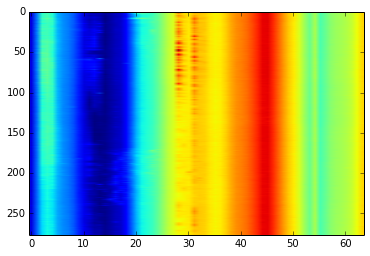

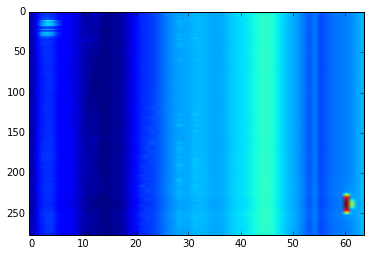

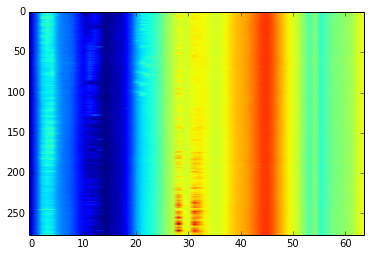

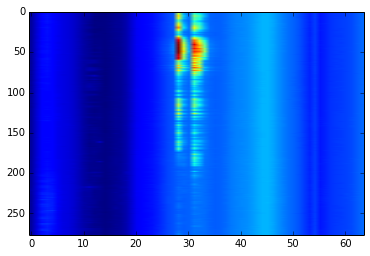

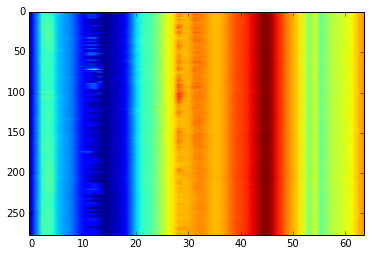

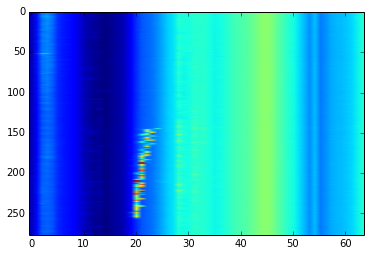

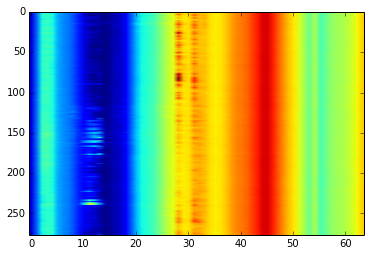

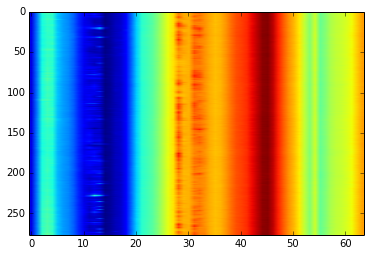

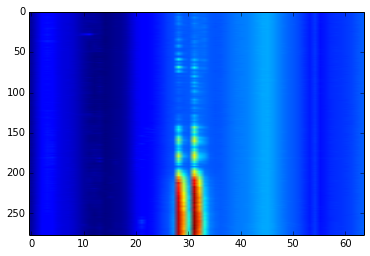

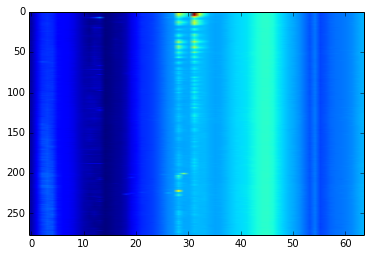

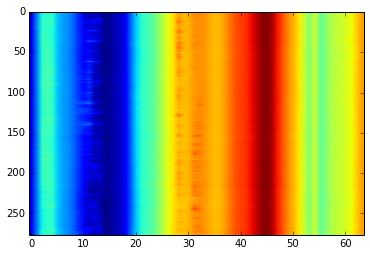

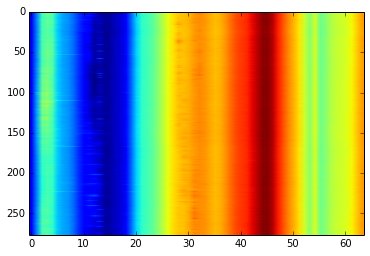

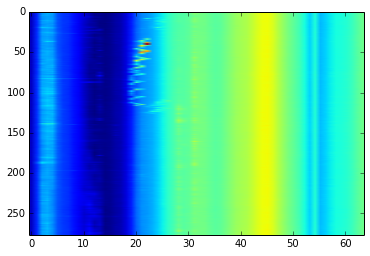

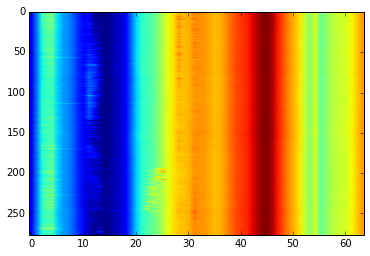

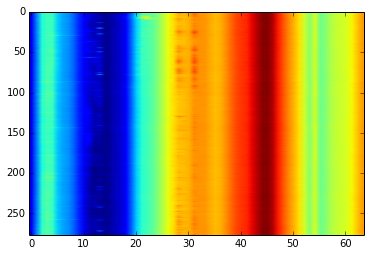

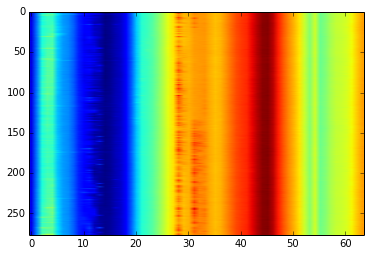

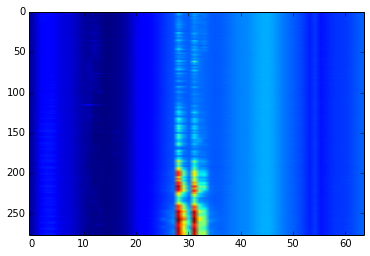

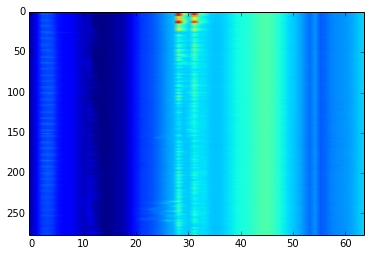

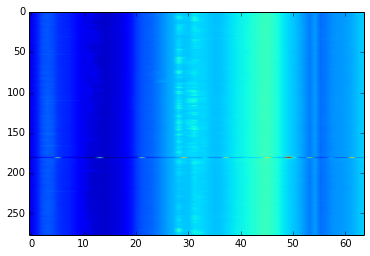

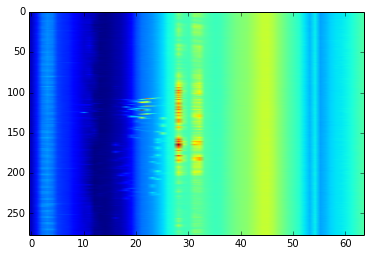

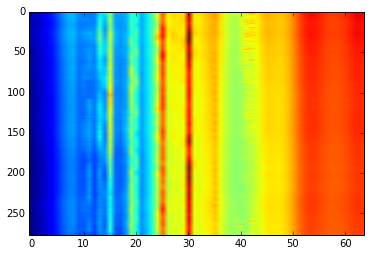

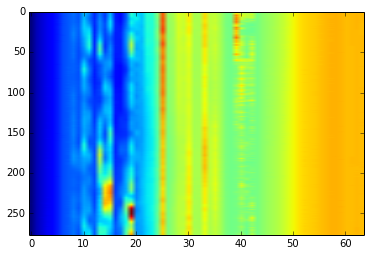

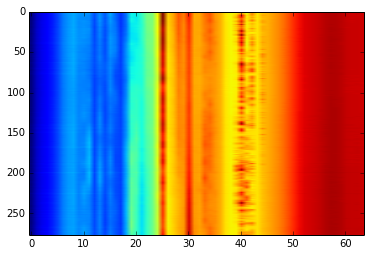

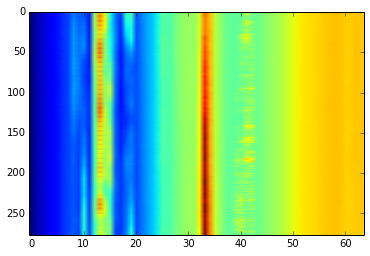

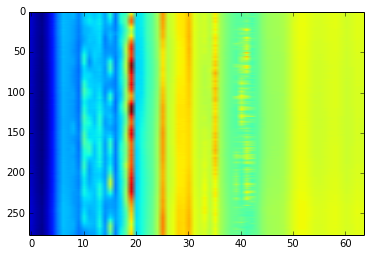

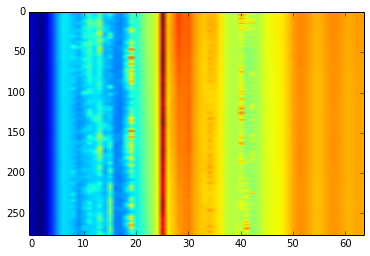

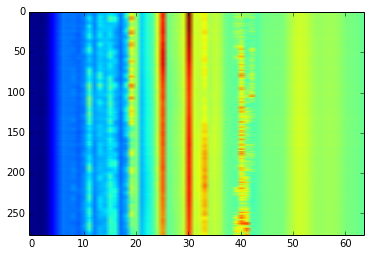

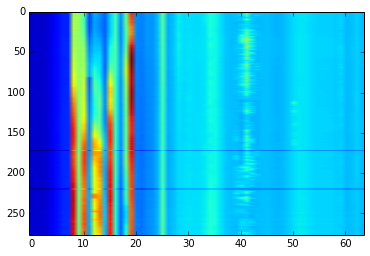

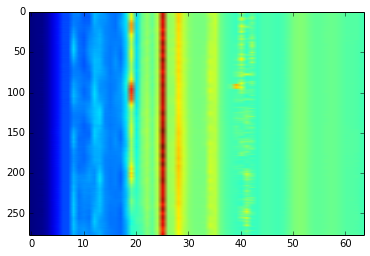

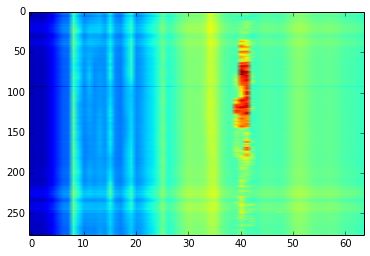

In [41]:
# CLASS 1
i = 0;
for label in km.labels_:
    if label == 1:
        # load numpy array from disk
        d = np.load(files[i])
        pl.imshow(d, aspect='auto')
        pl.show()
    i += 1


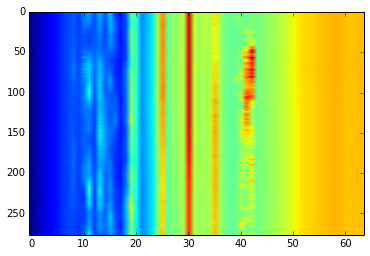

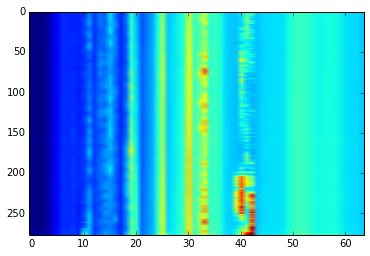

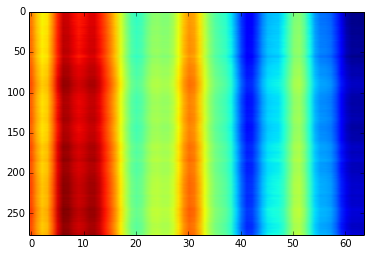

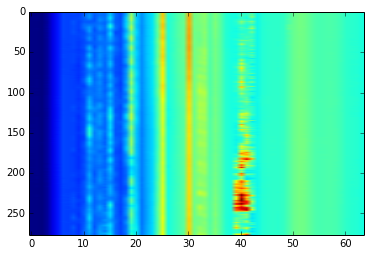

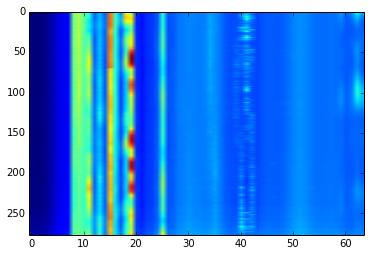

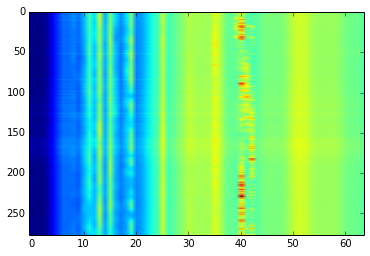

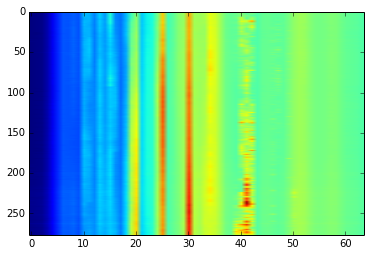

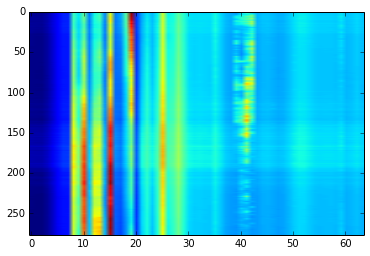

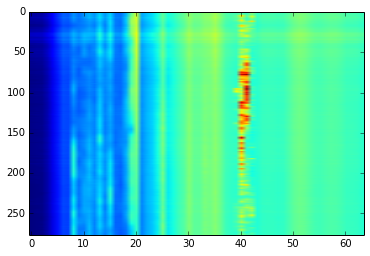

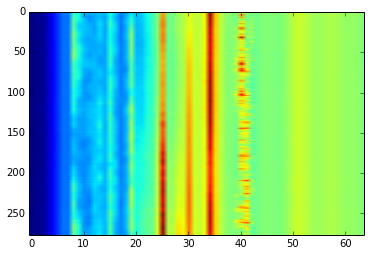

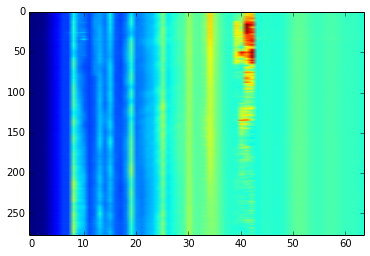

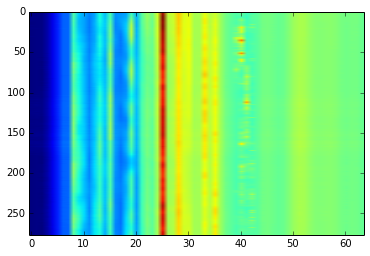

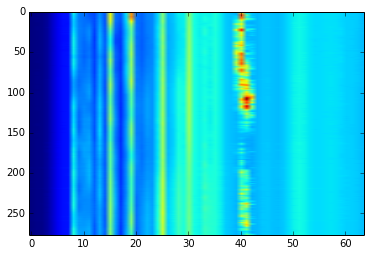

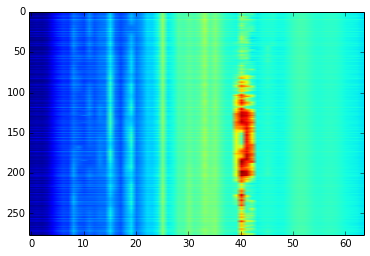

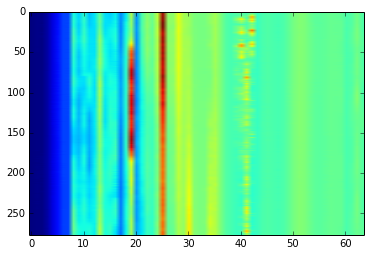

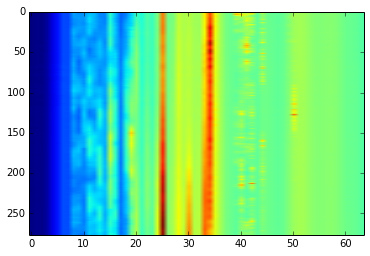

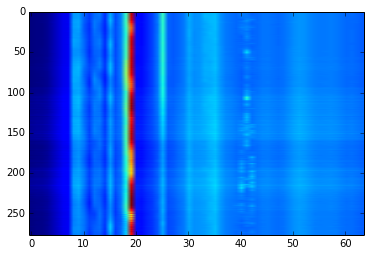

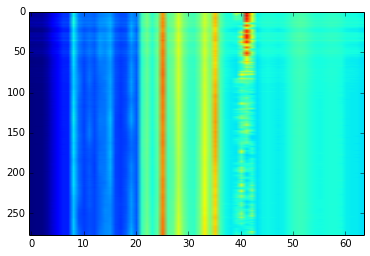

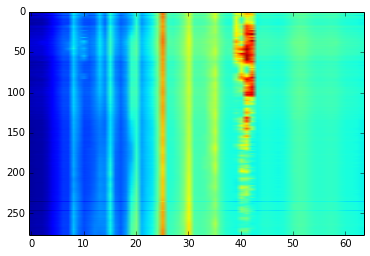

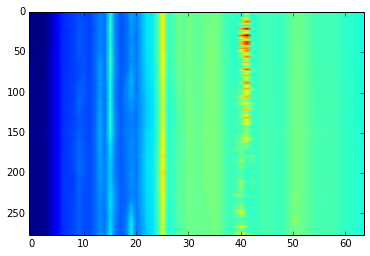

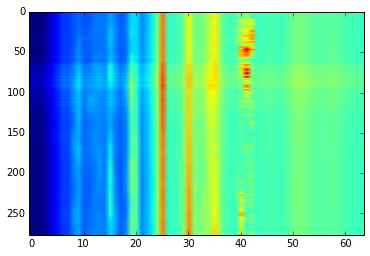

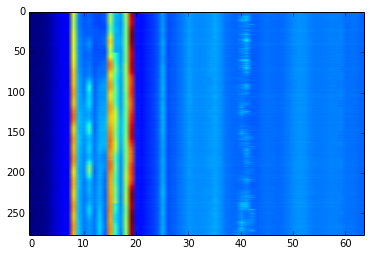

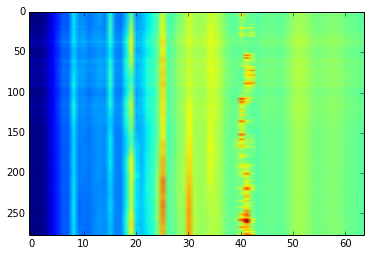

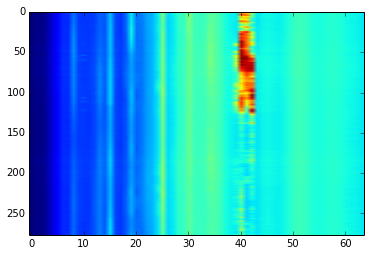

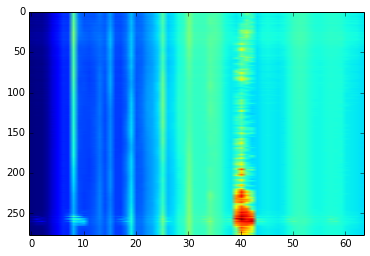

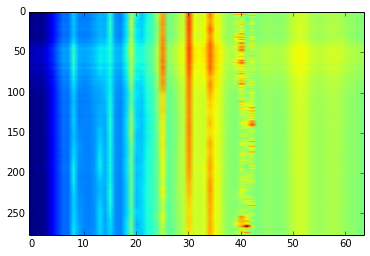

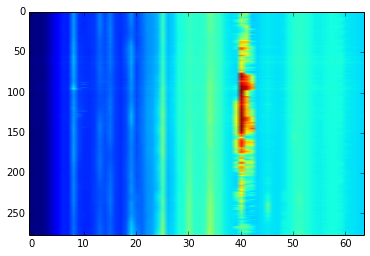

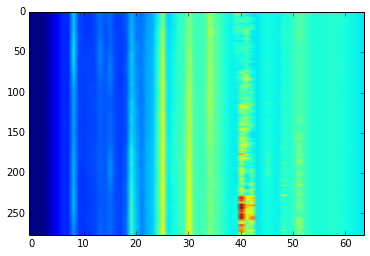

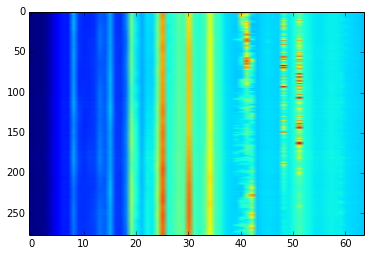

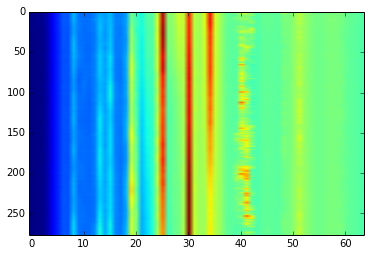

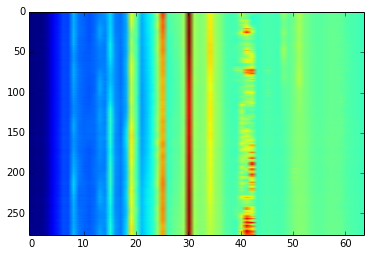

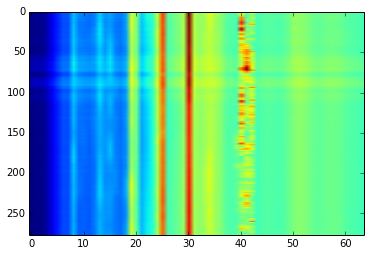

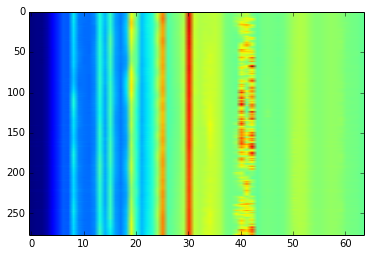

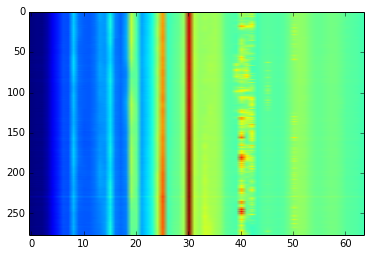

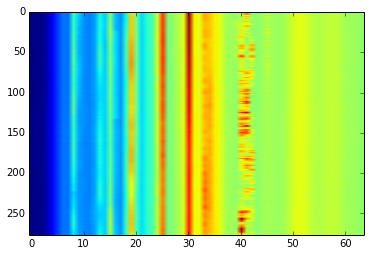

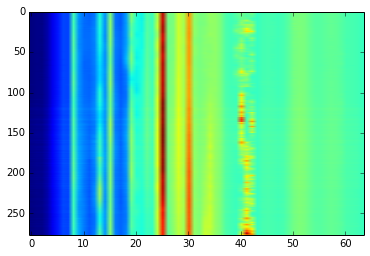

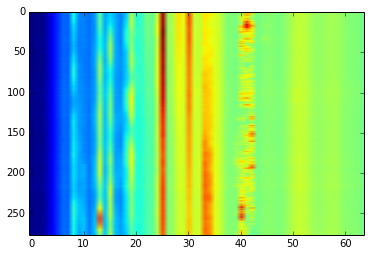

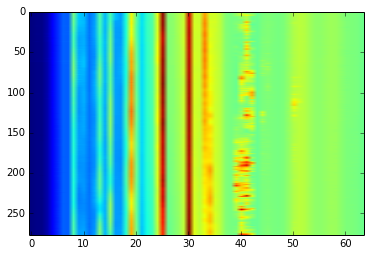

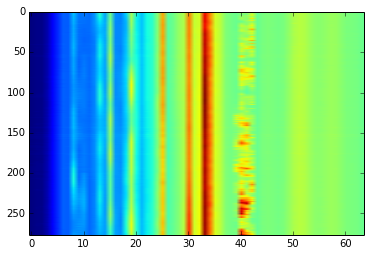

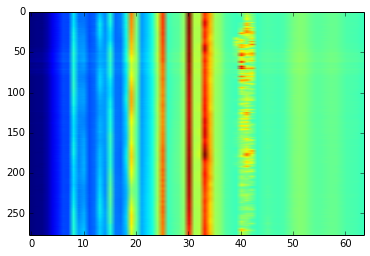

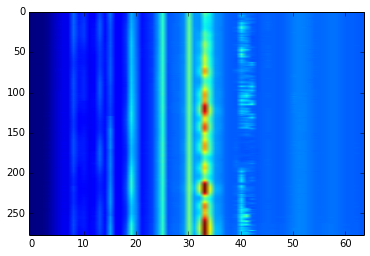

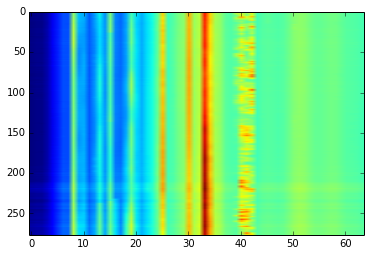

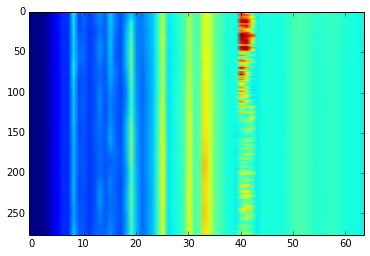

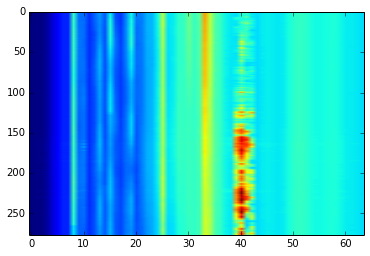

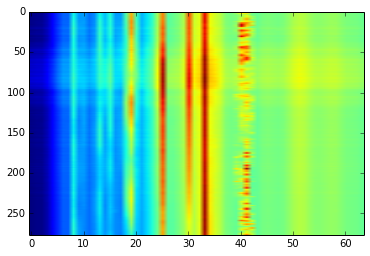

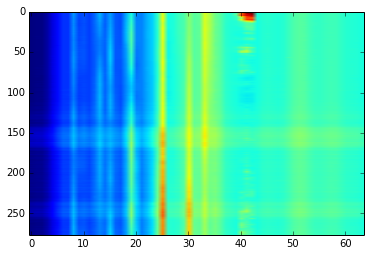

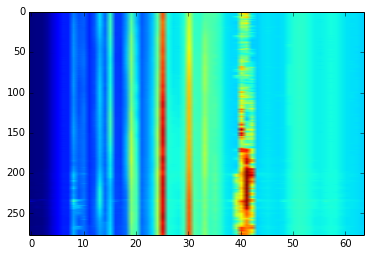

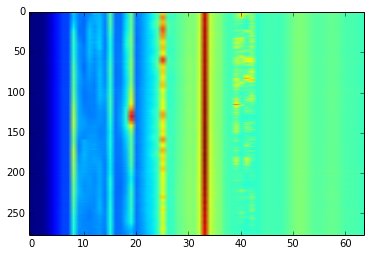

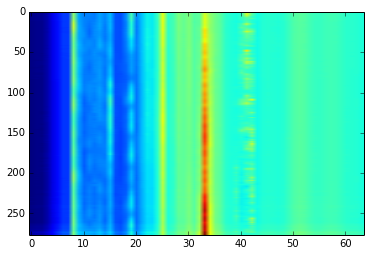

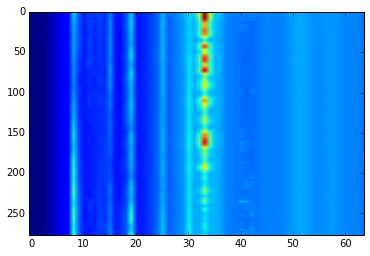

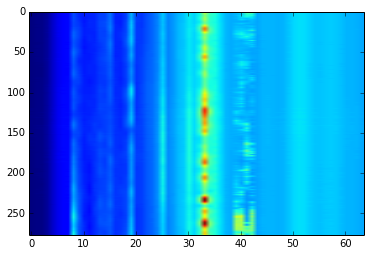

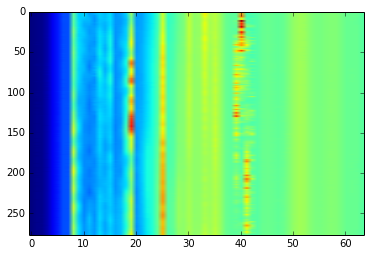

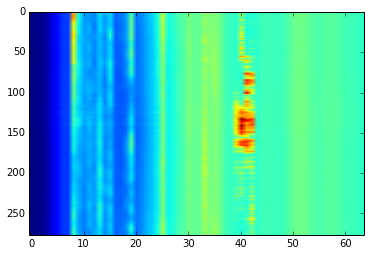

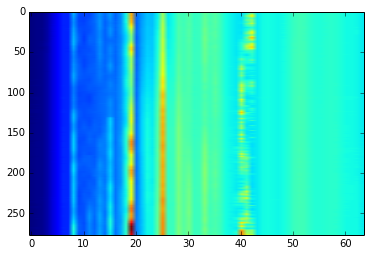

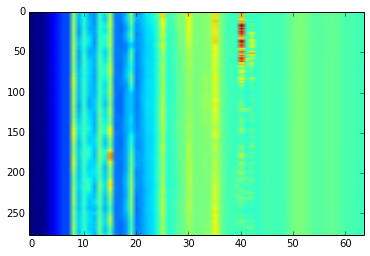

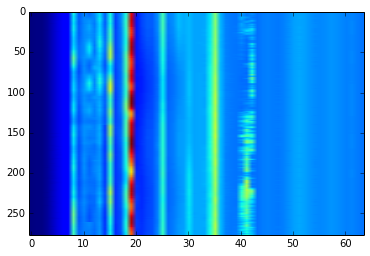

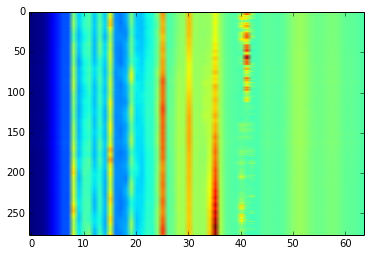

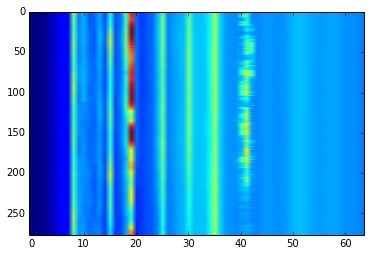

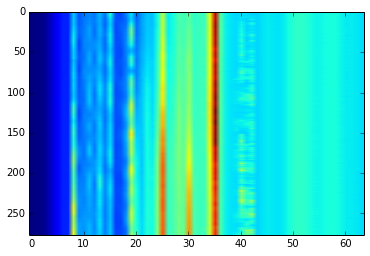

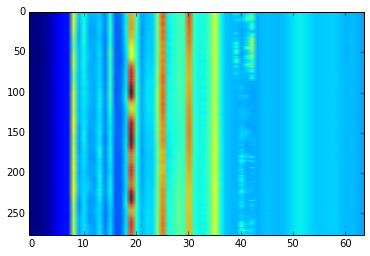

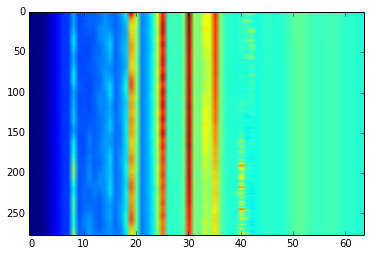

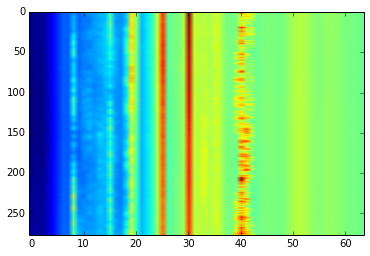

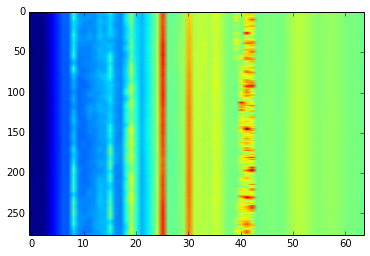

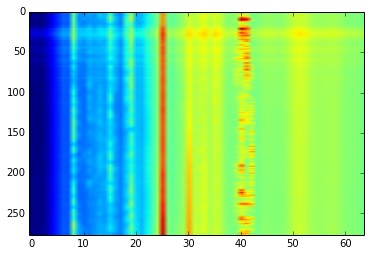

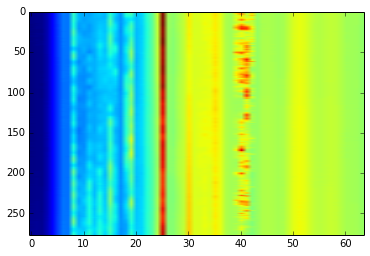

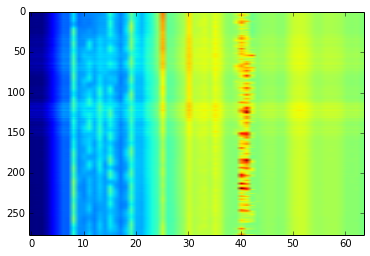

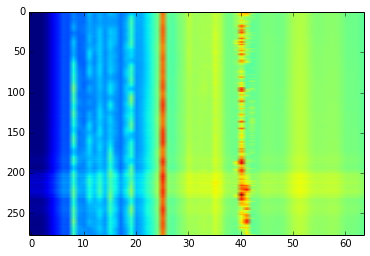

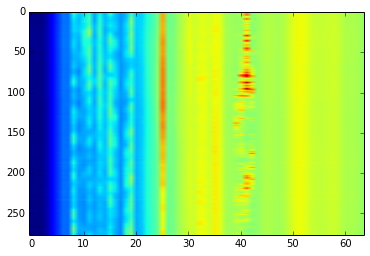

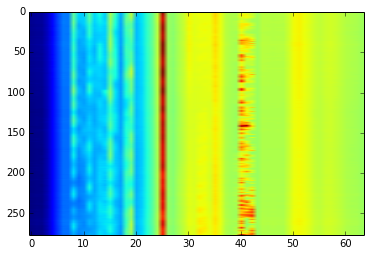

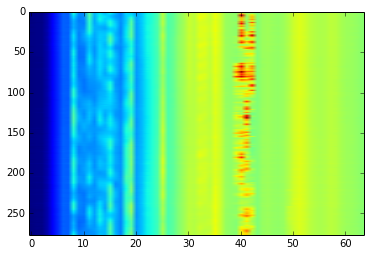

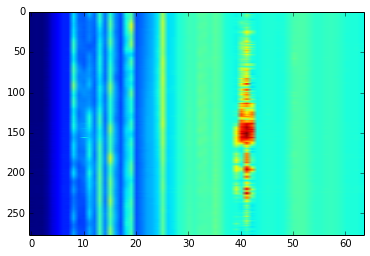

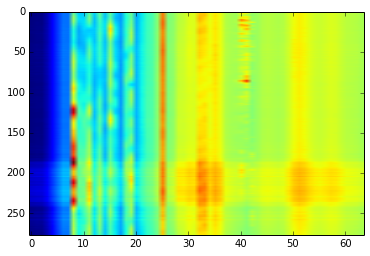

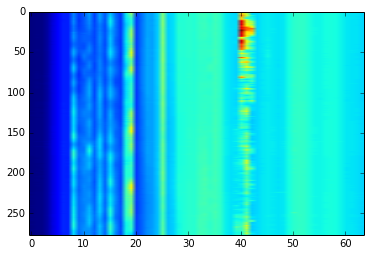

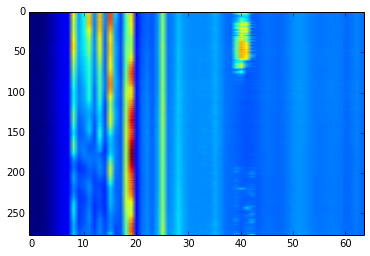

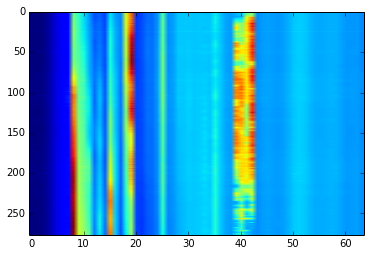

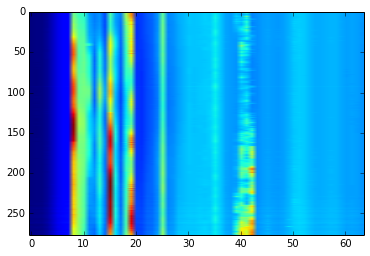

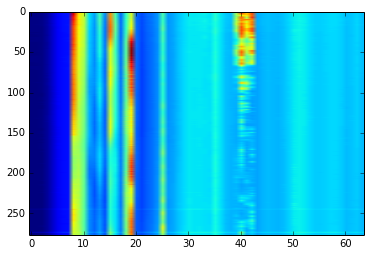

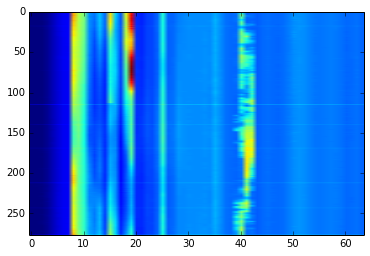

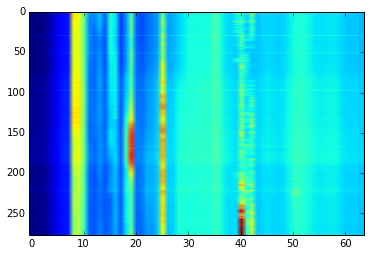

In [42]:
# CLASS 2
i = 0;
for label in km.labels_:
    if label == 2:
        # load numpy array from disk
        d = np.load(files[i])
        pl.imshow(d, aspect='auto')
        pl.show()
    i += 1


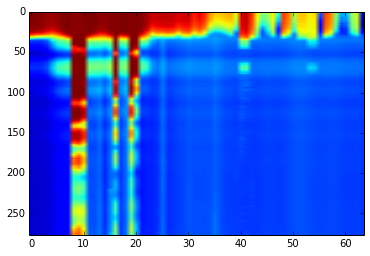

In [43]:
# CLASS 3
i = 0;
for label in km.labels_:
    if label == 3:
        # load numpy array from disk
        d = np.load(files[i])
        pl.imshow(d, aspect='auto')
        pl.show()
    i += 1


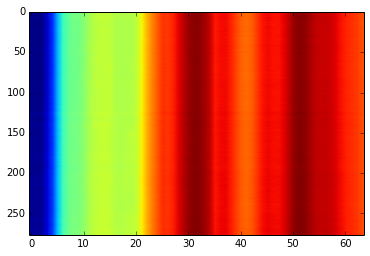

In [44]:
# CLASS 4
i = 0;
for label in km.labels_:
    if label == 4:
        # load numpy array from disk
        d = np.load(files[i])
        pl.imshow(d, aspect='auto')
        pl.show()
    i += 1
